In [1]:
import pandas as pd
import numpy as np
import time
import datetime 
import calendar
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 53000
%matplotlib inline

In [2]:
data = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/Gracia/notebook-serie-Gra_NO-19', parse_dates= ['DATA'], index_col='DATA',header=0)

In [3]:
vent_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/meteo/meteo-vent-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [4]:
temp_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/meteo/meteo-temp-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [5]:
hum_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/meteo/meteo-hum-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [6]:
prep_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/meteo/meteo-prep-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [7]:
pre_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/meteo/meteo-pressio-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [8]:
pre_raval = np.log(pre_raval)

In [9]:
trans_8001 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/transit/transit-8001', parse_dates= ['DATA'], index_col='DATA',header=0)

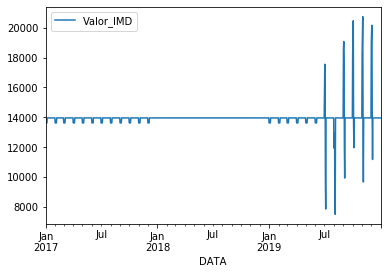

In [10]:
trans_8001.plot()

In [11]:
trans_8001 = np.log(trans_8001)

In [12]:
trans_8039 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/transit/transit-8039', parse_dates= ['DATA'], index_col='DATA',header=0)

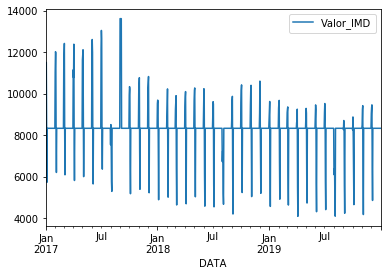

In [13]:
trans_8039.plot()

In [14]:
trans_8039 = np.log(trans_8039)

In [15]:
vent_raval.rename(columns={'VALOR_LECTURA':'VENT_RAVAL'}, inplace=True)

In [16]:
temp_raval.rename(columns={'VALOR_LECTURA':'TEMP_RAVAL'}, inplace=True)

In [17]:
hum_raval.rename(columns={'VALOR_LECTURA':'HUM_RAVAL'}, inplace=True)

In [18]:
prep_raval.rename(columns={'VALOR_LECTURA':'PREP_RAVAL'}, inplace=True)

In [19]:
pre_raval.rename(columns={'VALOR_LECTURA':'PRE_RAVAL'}, inplace=True)

In [20]:
trans_8001.rename(columns={'Valor_IMD':'8001'}, inplace=True)

In [21]:
trans_8039.rename(columns={'Valor_IMD':'8039'}, inplace=True)

In [22]:
final = pd.merge(data, vent_raval, on = 'DATA')

In [23]:
final = pd.merge(final, temp_raval, on = 'DATA')

In [24]:
final = pd.merge(final, temp_raval, on = 'DATA')

In [25]:
final = pd.merge(final, pre_raval, on = 'DATA')

In [26]:
final = pd.merge(final, prep_raval, on = 'DATA')

In [27]:
final = pd.merge(final, trans_8001, on= 'DATA')

In [28]:
final = pd.merge(final, trans_8039, on = 'DATA')

In [29]:
final.head()

,H,VENT_RAVAL,TEMP_RAVAL_x,TEMP_RAVAL_y,PRE_RAVAL,PREP_RAVAL,8001,8039
DATA,,,,,,,,
2017-01-01,25.5,2.6,13.1,13.1,6.931862,0.0,9.519345,9.252154
2017-01-02,177.5,3.0,15.7,15.7,6.921658,0.0,9.519345,9.346182
2017-01-03,33.5,4.0,15.6,15.6,6.923530,0.0,9.519345,9.350972
2017-01-04,15.0,3.2,14.9,14.9,6.920770,3.3,9.519345,8.989320
2017-01-05,9.5,4.0,17.5,17.5,6.924121,0.0,9.519345,8.655040


In [30]:
TEST_SIZE = 310

In [31]:
train, test = final[:-TEST_SIZE], final[-TEST_SIZE:]

In [32]:
train.shape

(785, 8)

In [33]:
train_1 = train.values
test_1 = test.values

In [34]:
train_1.shape

(785, 8)

In [35]:
x = np.arange(8760)
x = np.reshape(x, (1095,8))

In [36]:
x_train = x[:-TEST_SIZE]

In [37]:
x_test = x[-TEST_SIZE:]

In [38]:
prueba = pd.merge(data, vent_raval, on = 'DATA')

In [39]:
prueba = pd.merge(prueba, temp_raval, on = 'DATA')

In [40]:
prueba = pd.merge(prueba, temp_raval, on = 'DATA')

In [41]:
prueba = pd.merge(prueba, pre_raval, on = 'DATA')

In [42]:
prueba = pd.merge(prueba, prep_raval, on = 'DATA')

In [43]:
prueba = pd.merge(prueba, trans_8001, on= 'DATA')

In [44]:
prueba = pd.merge(prueba, trans_8039, on = 'DATA')

# ARIMA / SARIMA

In [45]:
ultimo_fecha = max(data.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(data.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
data = data.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [46]:
data.isnull().sum()

H    0
dtype: int64

In [47]:
mean = data['H'].astype(float).mean(skipna=True)

In [48]:
data['H'].replace(to_replace=np.NaN, value= mean, inplace=True)

In [49]:
data.isnull().sum()

H    0
dtype: int64

In [50]:
data.describe()

,H
count,1095.000000
mean,64.219410
std,64.535954
min,3.000000
25%,23.500000
50%,42.000000
75%,80.000000
max,491.500000


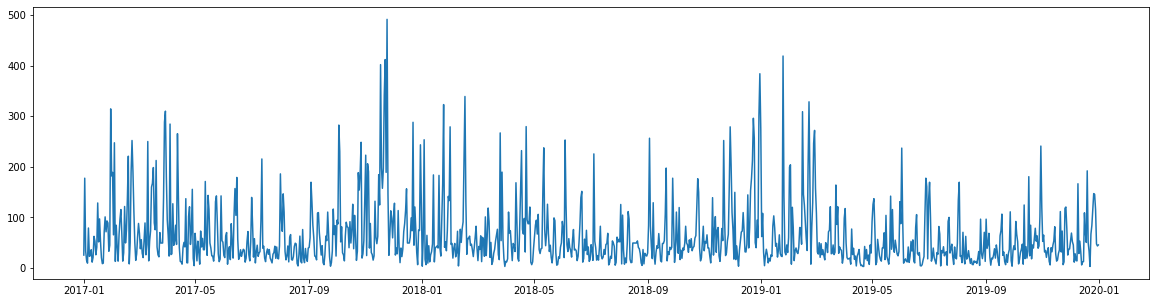

In [51]:
plt.figure(figsize=(20,5))
plt.plot(data)

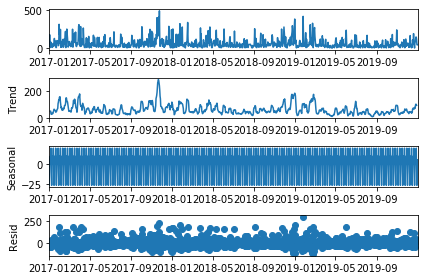

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)
fig= decomposition.plot()

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


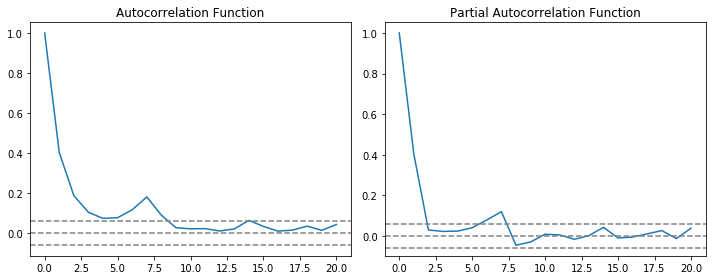

In [53]:
plt.figure(figsize=(10,4))

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags= 20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle= '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle= '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [54]:
from statsmodels.tsa.arima_model import ARIMA

model_conf = ARIMA(data, order= (2,1, 3))
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6010.361
Method:                       css-mle   S.D. of innovations             58.791
Date:                Thu, 23 Jul 2020   AIC                          12034.722
Time:                        11:24:36   BIC                          12069.706
Sample:                    01-02-2017   HQIC                         12047.960
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0120      0.078     -0.155      0.877      -0.164       0.140
ar.L1.D.H     -0.4920      0.218     -2.254      0.024      -0.920      -0.064
ar.L2.D.H      0.3125      0.093      3.349      0.001       0.130       0.495
ma.L1.D.H     -0.1231      0.220     -0.560      0.575      -0.554       0.308
ma.L2.D.H     -0.8424      0.175     -4.804      0.000      -1.186      -0.499
ma.L3.D.H      0.0151      0.084      0.180      0.857      -0.149       0.179
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1673           +0.0000j            1.1673            0.5000
AR.2            2.7419           +0.0000j            2.7419            0.0000
MA.1            1.0278           +0.0000j            1.0278            0.0000
MA.2           -1.1524           +0.0000j            1.1524            0.5000
MA.3           56.0189           +0.0000j           56.0189            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
model_conf = ARIMA(data[:'2019-12-31'], order=(2,1,3))
model_fit= model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6010.361
Method:                       css-mle   S.D. of innovations             58.791
Date:                Thu, 23 Jul 2020   AIC                          12034.722
Time:                        11:24:37   BIC                          12069.706
Sample:                    01-02-2017   HQIC                         12047.960
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0120      0.078     -0.155      0.877      -0.164       0.140
ar.L1.D.H     -0.4920      0.218     -2.254      0.024      -0.920      -0.064
ar.L2.D.H      0.3125      0.093      3.349      0.001       0.130       0.495
ma.L1.D.H     -0.1231      0.220     -0.560      0.575      -0.554       0.308
ma.L2.D.H     -0.8424      0.175     -4.804      0.000      -1.186      -0.499
ma.L3.D.H      0.0151      0.084      0.180      0.857      -0.149       0.179
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1673           +0.0000j            1.1673            0.5000
AR.2            2.7419           +0.0000j            2.7419            0.0000
MA.1            1.0278           +0.0000j            1.0278            0.0000
MA.2           -1.1524           +0.0000j            1.1524            0.5000
MA.3           56.0189           +0.0000j           56.0189            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
model_conf = ARIMA(data[:'2019-12-31'], order =(2,1,2), freq='D')
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6010.377
Method:                       css-mle   S.D. of innovations             58.791
Date:                Thu, 23 Jul 2020   AIC                          12032.755
Time:                        11:24:39   BIC                          12062.740
Sample:                    01-02-2017   HQIC                         12044.101
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.078     -0.149      0.881      -0.165       0.142
ar.L1.D.H     -0.5149      0.178     -2.894      0.004      -0.864      -0.166
ar.L2.D.H      0.3025      0.074      4.082      0.000       0.157       0.448
ma.L1.D.H     -0.0987      0.174     -0.568      0.570      -0.439       0.242
ma.L2.D.H     -0.8499      0.169     -5.018      0.000      -1.182      -0.518
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1565           +0.0000j            1.1565            0.5000
AR.2            2.8589           +0.0000j            2.8589            0.0000
MA.1            1.0282           +0.0000j            1.0282            0.0000
MA.2           -1.1444           +0.0000j            1.1444            0.5000
-----------------------------------------------------------------------------
"""

In [57]:
residuals = pd.DataFrame(model_fit.resid)

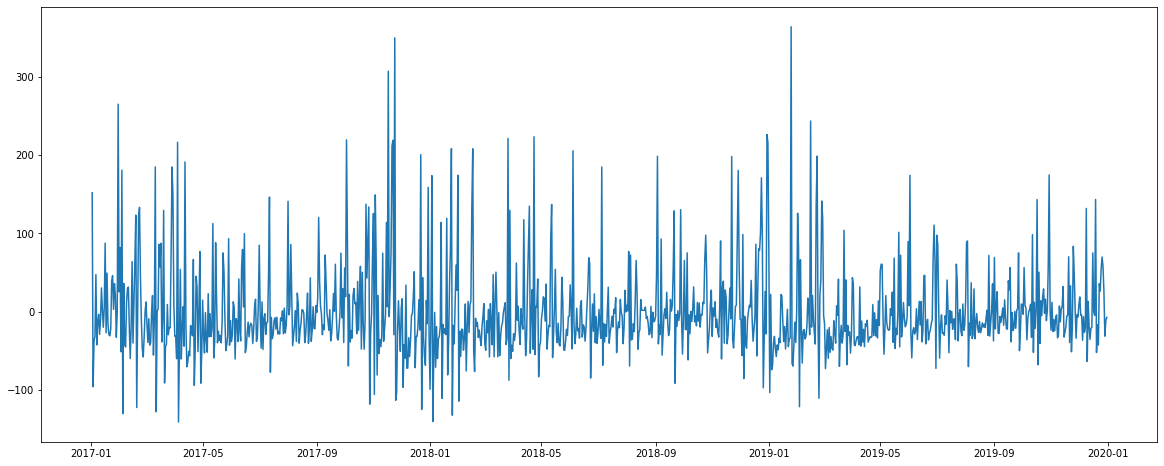

In [58]:
plt.figure(figsize=(20,8))
plt.plot(residuals)

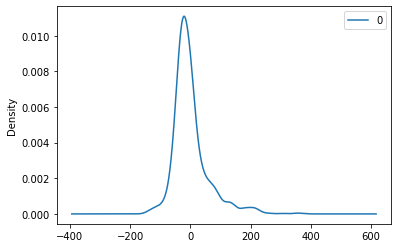

In [59]:
residuals.plot(kind='kde')

In [60]:
ini_forecast = pd.Timestamp('2019-01-01', freq='D')
ndays= 310

end_forecast = ini_forecast + ndays -1

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  after removing the cwd from sys.path.


In [61]:
model_conf = ARIMA(data[:ini_forecast-1], order=(2,1,2), freq='D')
model_fit = model_conf.fit()
forecast = model_fit.forecast(ndays)[0]
forecast = pd.DataFrame(forecast, columns=['forecast'],
                       index=data[ini_forecast:end_forecast].index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  """Entry point for launching an IPython kernel.


In [62]:
forecast_daily = []
for d in range (ndays):
    ini_test = ini_forecast + d
    modelconf_day =ARIMA(data[:ini_test - 1], order = (2,1,1), freq='D')
    modelfit_day = modelconf_day.fit()
    forecast_daily.append(modelfit_day.forecast(1)[0])
    
forecast_daily = pd.DataFrame(forecast_daily, columns=['forecast'],
                             index=data[ini_forecast:end_forecast].index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  after removing the cwd from sys.path.


/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  


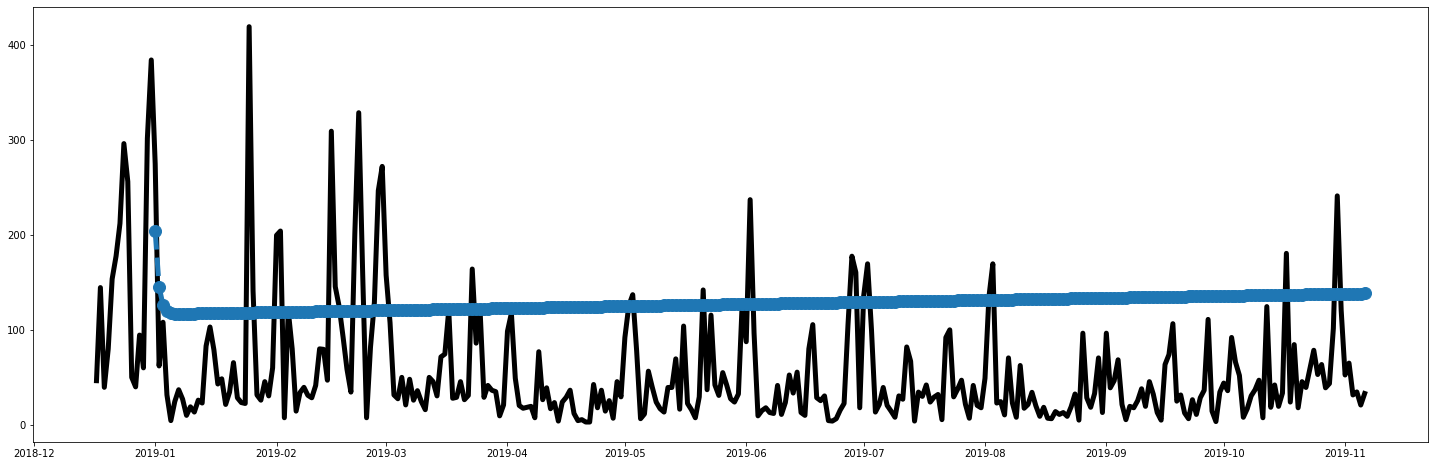

In [63]:
plt.figure(figsize=(25, 8))
plt.plot(data[ini_forecast-15:end_forecast], linewidth=5, color='black')
plt.plot(forecast, linewidth=5, linestyle='--', markersize=12, marker='o')

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  


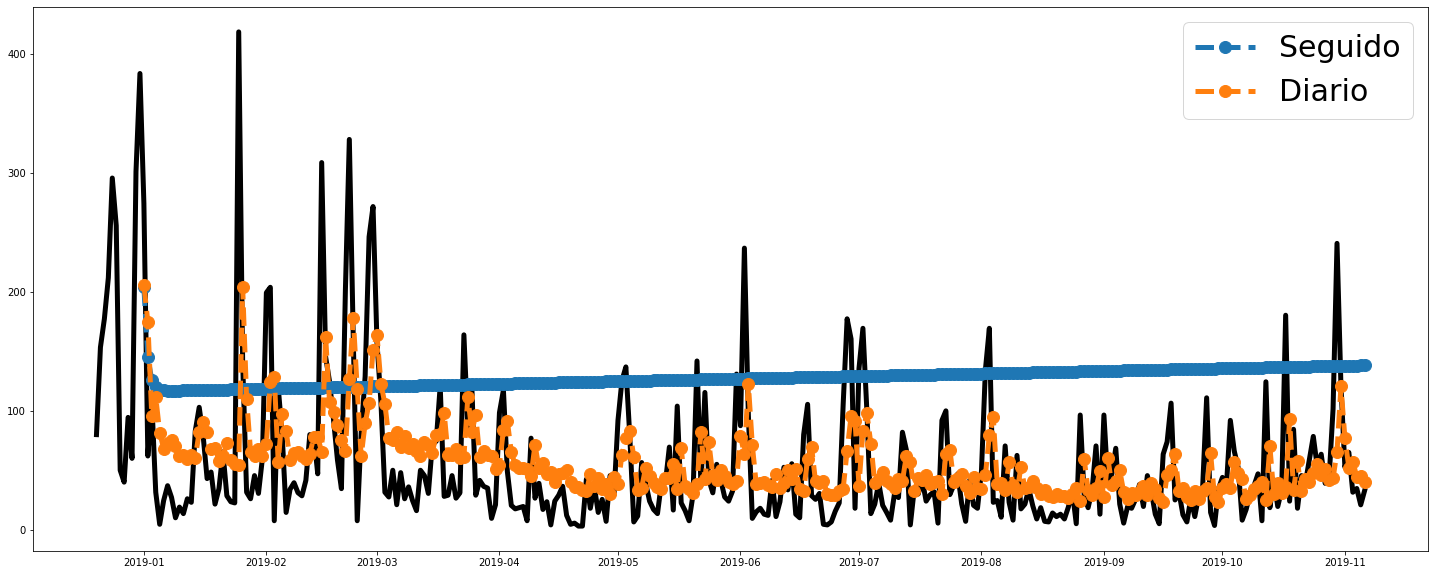

In [64]:
plt.figure(figsize=(25, 10))
plt.plot(data[ini_forecast-12:end_forecast], linewidth=5, color='black')
plt.plot(forecast, linewidth=5, linestyle='--', markersize=12, marker='o', label='Seguido')
plt.plot(forecast_daily, linewidth=5, linestyle='--', markersize= 12, marker='o', label='Diario')
plt.legend(prop={'size':30})

# REGRESIÓN LINEAL

In [65]:
data.shape

(1095, 1)

In [66]:
train_data, test_data = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]

In [67]:
x_train_data = np.array(range(train_data.shape[0]))
x_test_data = np.array(range(train_data.shape[0], data.shape[0]))

In [68]:
x_test_data.shape

(310,)

In [69]:
x_train_data.shape

(785,)

In [70]:
train_data.shape

(785, 1)

In [71]:
test_data.shape

(310, 1)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
y_pred_mean = [train_data.values[-12:].mean()] * 310

In [74]:
train_data = train_data.values

In [75]:
lr_model = LinearRegression()
lr_model.fit(x_train_data.reshape(-1,1), train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_pred_lr = lr_model.predict(x_test_data.reshape(-1,1))

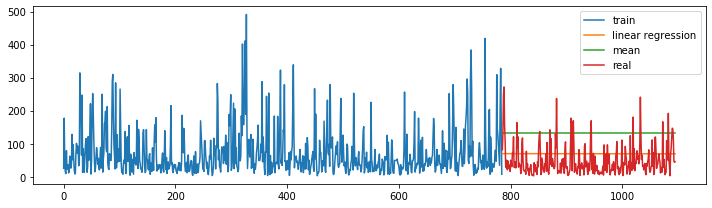

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(x_train_data, train_data, label='train')
ax.plot(x_test_data, y_pred_lr, label ='linear regression')
ax.plot(x_test_data, y_pred_mean, label='mean')
ax.plot(x_test_data, test_data, label ='real')
plt.legend()
plt.tight_layout()

In [78]:
def mae(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / y_true.size

In [79]:
print('MAE in a mean model:', mae (test_data.values, y_pred_mean))

MAE in a mean model: 27772.22011265447


In [80]:
print('MAE in linear regression model:', mae(test_data.values, y_pred_lr))

MAE in linear regression model: 43.59246007672519


In [81]:
def mse(y_true, y_pred):
    return((y_true - y_pred)** 2).sum() / y_true.size

In [82]:
print('MSE in mean model:', mse(test_data.values, y_pred_mean))
print('MSE in linear regression model:', mse(test_data.values, y_pred_lr))

MSE in mean model: 2838548.947837356
MSE in linear regression model: 2548.6453104626958


In [83]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)** 2).sum() / y_true.size)

In [84]:
print('RMSE in mean model:', rmse(test_data.values, y_pred_mean))
print('RMSE in linear regression model:', rmse(test_data.values, y_pred_lr))

RMSE in mean model: 1684.7993791064134
RMSE in linear regression model: 50.48410948469524


In [85]:
def mape (y_true, y_pred):
    return 2 * np.abs((y_true - y_pred) / y_true).sum() / y_true.size

In [86]:
print('MAPE in mean model:', mape(test_data.values, y_pred_mean))
print('MAPE in linear regression model:', mape(test_data.values, y_pred_lr))

MAPE in mean model: 3383.411641870448
MAPE in linear regression model: 5.080315661050121


In [87]:
lrw_model = LinearRegression()
lrw_model.fit(x_train_data.reshape(-1,1), train_data,
             sample_weight= [i**5 for i in x_train_data])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_pred_lr_w = lrw_model.predict(x_test_data.reshape(-1, 1))

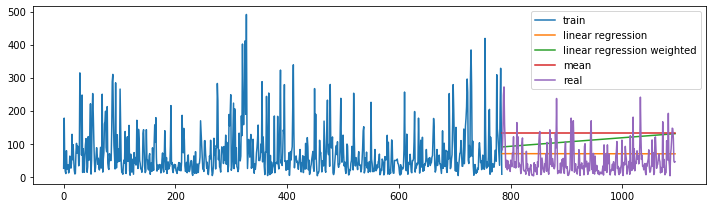

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(x_train_data, train_data, label='train')
ax.plot(x_test_data, y_pred_lr, label='linear regression')
ax.plot(x_test_data, y_pred_lr_w, label='linear regression weighted')
ax.plot(x_test_data, y_pred_mean, label='mean')
ax.plot(x_test_data, test_data, label='real')
plt.legend()
plt.tight_layout()

In [90]:
print('MAE in mean model: ', mae(test_data.values, y_pred_mean))
print('MAE in linear regression model: ', mae(test_data.values, y_pred_lr))
print('MAE in weighted linear regression model: ', mae(test_data.values, y_pred_lr_w))

print('RMSE in mean model: ', rmse(test_data.values, y_pred_mean))
print('RMSE in linear regression model: ', rmse(test_data.values, y_pred_lr))
print('RMSE in weighted linear regression model: ', rmse(test_data.values, y_pred_lr_w))

MAE in mean model:  27772.22011265447
MAE in linear regression model:  43.59246007672519
MAE in weighted linear regression model:  71.75721789965868
RMSE in mean model:  1684.7993791064134
RMSE in linear regression model:  50.48410948469524
RMSE in weighted linear regression model:  77.93986651999603


In [91]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), train_1.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

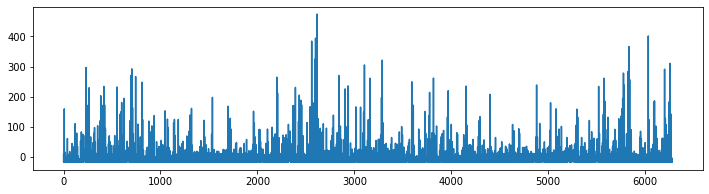

In [92]:
train_log_trend = (train_1.reshape(-1,1) - model.predict(x_train.reshape(-1, 1))).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train.reshape(-1,1), train_log_trend.reshape(-1,1))

In [93]:
type(train_log_trend)

numpy.ndarray

In [94]:
train_log_trend = pd.DataFrame(train_log_trend)

In [95]:
train_log_trend.replace(to_replace= -np.inf, value= 0.479792, inplace= True)

In [96]:
train_log_trend.head()

,0
0,7.633493
1,-15.266490
2,-4.766474
3,-4.766457
4,-10.934578


# REGRESIÓN POLINOMICA

In [97]:
prueba.shape

(1095, 8)

In [98]:
TEST_SIZE = 310

In [99]:
x_prueba = np.arange(8760)
x_prueba = np.reshape(x_prueba, (1095,8))

In [100]:
x_train_prueba =  x_prueba[:-TEST_SIZE]

In [101]:
x_test_prueba = x_prueba[-TEST_SIZE:]

In [102]:
prueba_train, prueba_test = prueba[:-TEST_SIZE], prueba[-TEST_SIZE:]

In [103]:
prueba_train_1 = prueba_train.values

In [104]:
prueba_test_1 = prueba_test.values

In [105]:
prueba = prueba.reset_index()

In [106]:
prueba.head()

,DATA,H,VENT_RAVAL,TEMP_RAVAL_x,TEMP_RAVAL_y,PRE_RAVAL,PREP_RAVAL,8001,8039
0,2017-01-01,25.5,2.6,13.1,13.1,6.931862,0.0,9.519345,9.252154
1,2017-01-02,177.5,3.0,15.7,15.7,6.921658,0.0,9.519345,9.346182
2,2017-01-03,33.5,4.0,15.6,15.6,6.923530,0.0,9.519345,9.350972
3,2017-01-04,15.0,3.2,14.9,14.9,6.920770,3.3,9.519345,8.989320
4,2017-01-05,9.5,4.0,17.5,17.5,6.924121,0.0,9.519345,8.655040


In [107]:
prueba.dtypes

DATA            datetime64[ns]
H                      float64
VENT_RAVAL             float64
TEMP_RAVAL_x           float64
TEMP_RAVAL_y           float64
PRE_RAVAL              float64
PREP_RAVAL             float64
8001                   float64
8039                   float64
dtype: object

In [108]:
prueba.shape

(1095, 9)

In [109]:
prueba['DATA'] = prueba['DATA'].astype(int)

In [110]:
prueba['DATA'] = np.arange(1095)

In [111]:
prueba.head()

,DATA,H,VENT_RAVAL,TEMP_RAVAL_x,TEMP_RAVAL_y,PRE_RAVAL,PREP_RAVAL,8001,8039
0,0,25.5,2.6,13.1,13.1,6.931862,0.0,9.519345,9.252154
1,1,177.5,3.0,15.7,15.7,6.921658,0.0,9.519345,9.346182
2,2,33.5,4.0,15.6,15.6,6.923530,0.0,9.519345,9.350972
3,3,15.0,3.2,14.9,14.9,6.920770,3.3,9.519345,8.989320
4,4,9.5,4.0,17.5,17.5,6.924121,0.0,9.519345,8.655040


In [112]:
prueba.set_index('DATA', inplace = True)

In [113]:
prueba.dtypes

H               float64
VENT_RAVAL      float64
TEMP_RAVAL_x    float64
TEMP_RAVAL_y    float64
PRE_RAVAL       float64
PREP_RAVAL      float64
8001            float64
8039            float64
dtype: object

In [114]:
prueba.head()

,H,VENT_RAVAL,TEMP_RAVAL_x,TEMP_RAVAL_y,PRE_RAVAL,PREP_RAVAL,8001,8039
DATA,,,,,,,,
0,25.5,2.6,13.1,13.1,6.931862,0.0,9.519345,9.252154
1,177.5,3.0,15.7,15.7,6.921658,0.0,9.519345,9.346182
2,33.5,4.0,15.6,15.6,6.923530,0.0,9.519345,9.350972
3,15.0,3.2,14.9,14.9,6.920770,3.3,9.519345,8.989320
4,9.5,4.0,17.5,17.5,6.924121,0.0,9.519345,8.655040


In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
poli_reg = PolynomialFeatures(degree = 3)

In [117]:
x_train_poli = poli_reg.fit_transform(x_train_prueba)

In [118]:
x_test_poli = poli_reg.fit_transform(x_test_prueba)

In [119]:
pr = LinearRegression()

In [120]:
pr.fit(x_train_poli, prueba_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
y_pred_pr = pr.predict(x_test_poli)

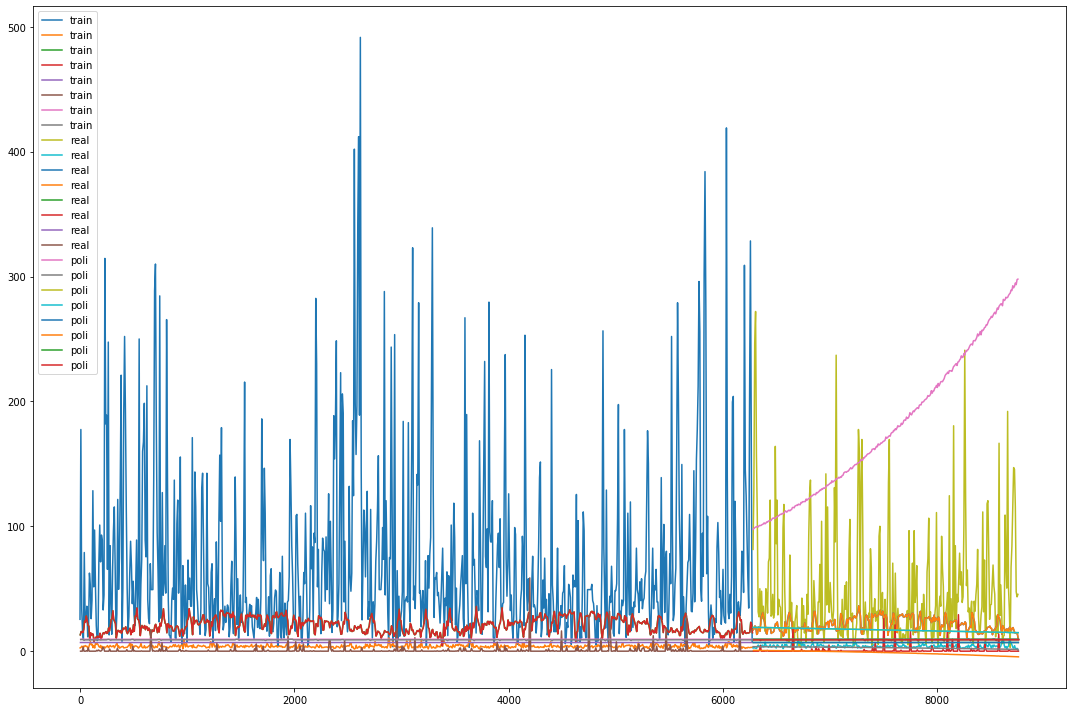

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x_train_prueba, prueba_train_1, label='train')
ax.plot(x_test_prueba, prueba_test_1, label='real')
ax.plot(x_test_prueba, y_pred_pr, label='poli')
plt.legend()
plt.tight_layout()

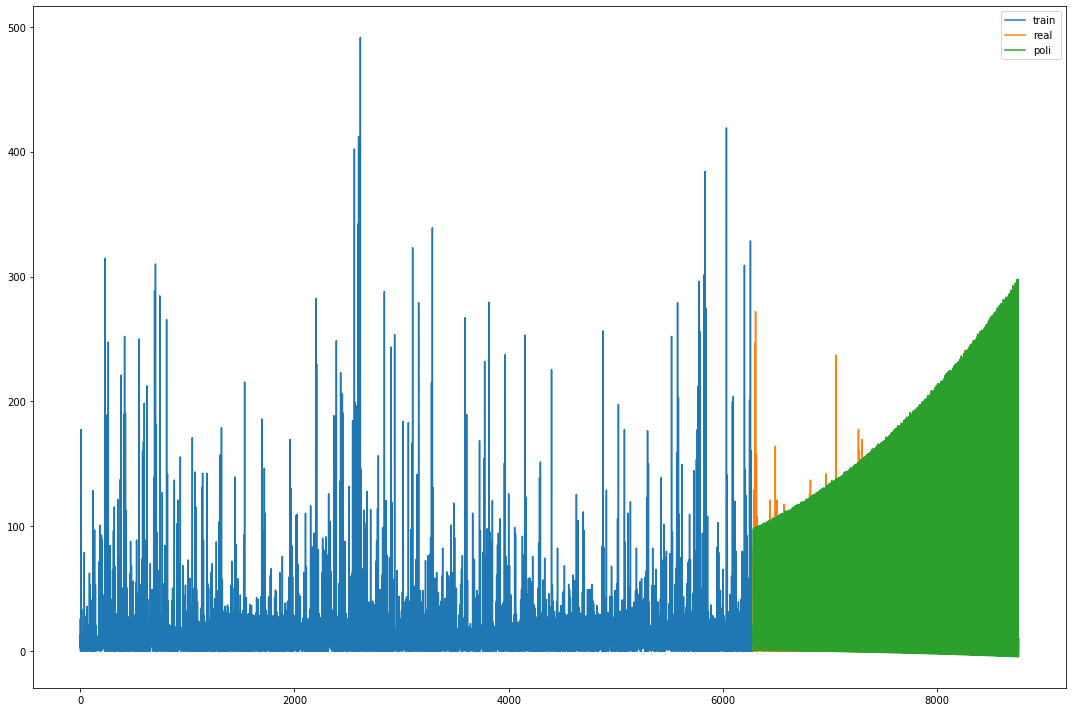

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x_train_prueba.reshape(-1,1), prueba_train_1.reshape(-1,1), label='train')
ax.plot(x_test_prueba.reshape(-1,1), prueba_test_1.reshape(-1,1), label='real')
ax.plot(x_test_prueba.reshape(-1,1), y_pred_pr.reshape(-1,1), label='poli')
plt.legend()
plt.tight_layout()

# ARBRES

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
tree_model = DecisionTreeRegressor()

In [126]:
tree_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [127]:
y_pred_tree = tree_model.predict(x_test.reshape(-1,1))

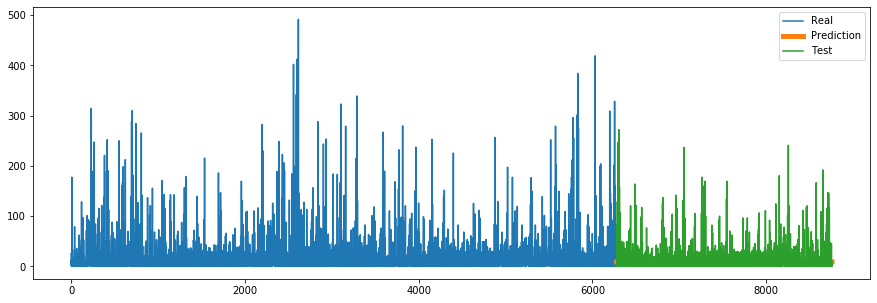

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_tree, label='Prediction', linewidth =5)
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label = 'Test')
ax.legend()

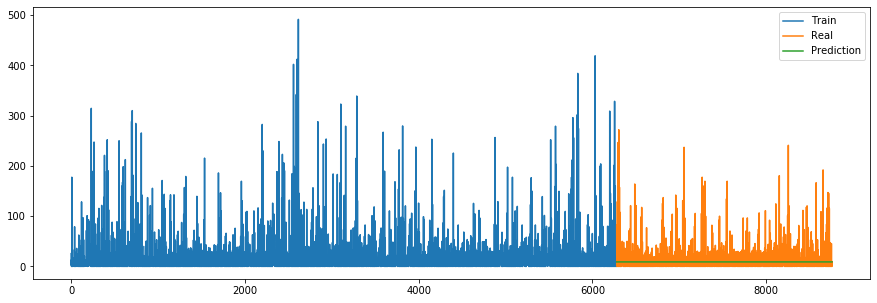

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_tree, label='Prediction')
ax.legend()

In [130]:
tree_model = DecisionTreeRegressor(max_depth=7)

In [131]:
tree_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [132]:
y_pred_tree = tree_model.predict(x_train.reshape(-1,1))

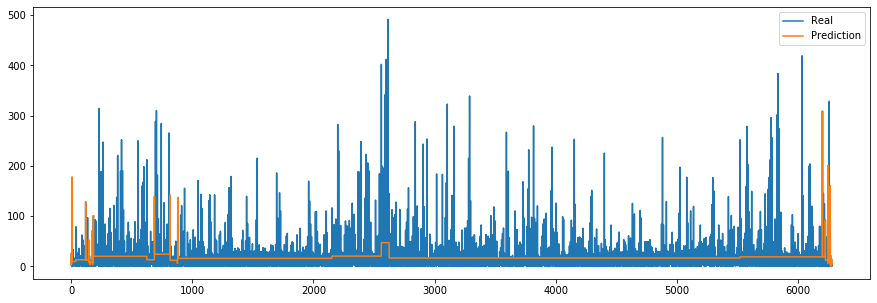

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Real')
ax.plot(x_train.reshape(-1,1), y_pred_tree, label='Prediction')
ax.legend()

# RANDOM FOREST

In [134]:
from sklearn import ensemble

In [135]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test.reshape(-1,1))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


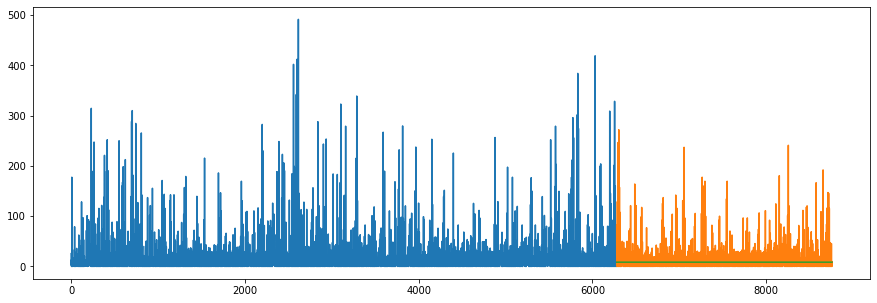

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')

In [137]:
x_train.reshape(-1,1).shape

(6280, 1)

In [138]:
x_test.reshape(-1,1).shape

(2480, 1)

In [139]:
x_train_month = np.hstack((x_train.reshape(-1,1), np.array(list(range(157)) * 40).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.array(list(range(155)) * 16).reshape(-1,1)))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


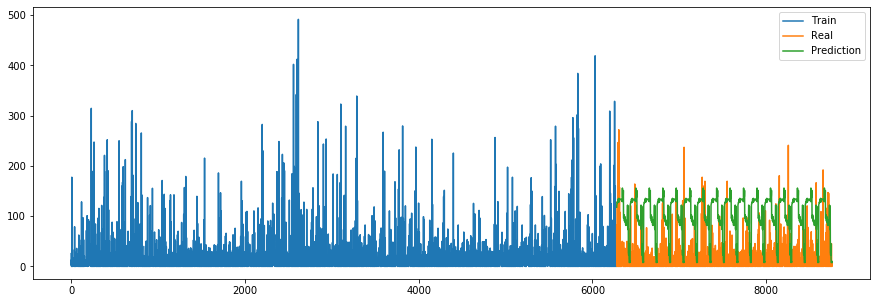

In [140]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month, train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test_month)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')
ax.legend()

In [141]:
x_train_month_year = np.hstack((x_train_month, np.repeat(list(range(157)), 40).reshape(-1,1)))
x_test_month_year = np.hstack((x_test_month, np.repeat(list(range(1,156)), 16).reshape(-1,1)))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


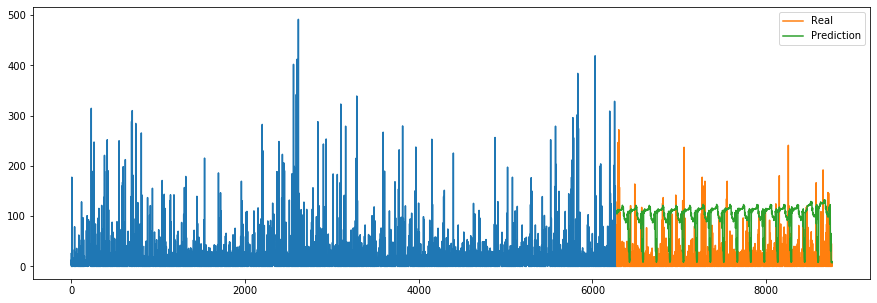

In [142]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test_month_year)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')
ax.legend()

# XGBOOST

In [143]:
from xgboost import XGBRegressor, plot_tree, plot_importance

In [144]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=4)
xgb_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_xgb = xgb_model.predict(x_test_month_year)

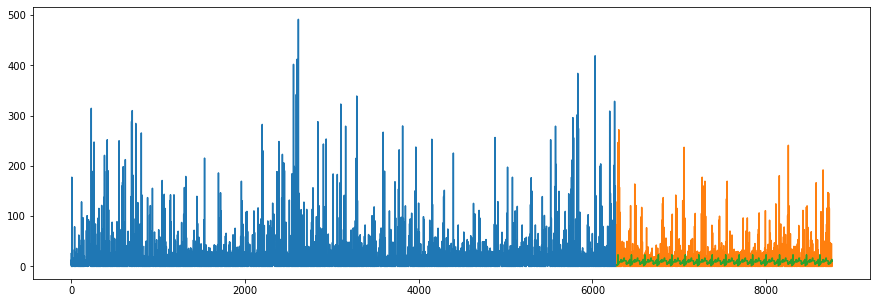

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')

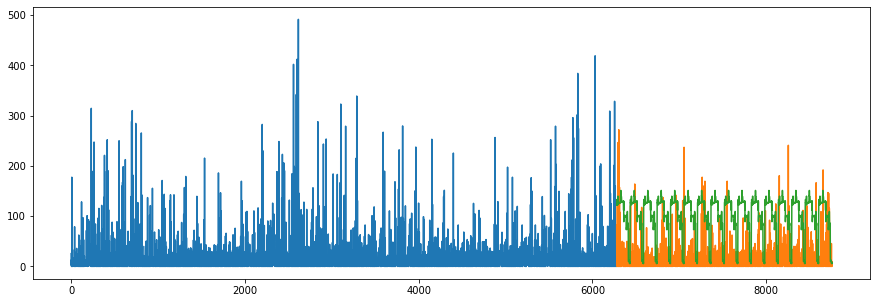

In [146]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=1)
xgb_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_xgb = xgb_model.predict(x_test_month_year)



fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')

In [147]:
x_train_month_year_2ylag = np.hstack(((train_1.reshape(-1,1)[24:] / train_1.reshape(-1,1)[:-24])[:-24],
                                      (train_1.reshape(-1,1)[24:] - train_1.reshape(-1,1)[:-24])[:-24],
                                      x_train_month_year[48:,:]))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [148]:
x_test_month_year_2ylag = np.hstack(((train_1[100:].reshape(-1,1) / train_1[:-100].reshape(-1,1))[:2480],
                                     (train_1[100:].reshape(-1,1) - train_1[:-100].reshape(-1,1))[:2480],
                                     x_test_month_year))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


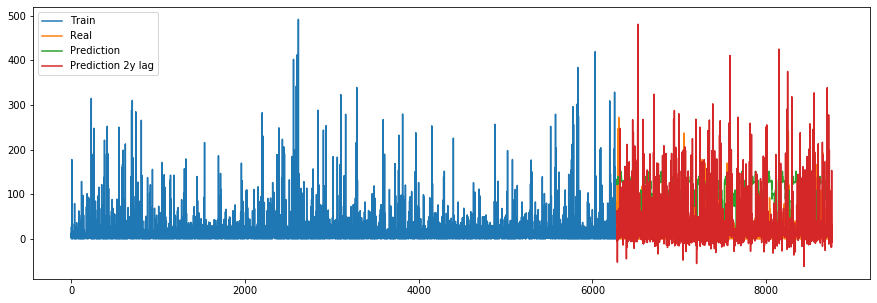

In [149]:
xgb_model = XGBRegressor(n_estimators=300, max_depth=3, learning_rate= 1.2)
xgb_model.fit(x_train_month_year_2ylag, train_1.reshape(-1,1)[48:])
y_pred_xgb_2ylag = xgb_model.predict(x_test_month_year_2ylag)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag, label='Prediction 2y lag')
ax.legend()

In [150]:
print(xgb_model.score(x_train_month_year_2ylag, train_1.reshape(-1,1)[48:]))

0.9849810614712103


<Figure size 432x288 with 0 Axes>

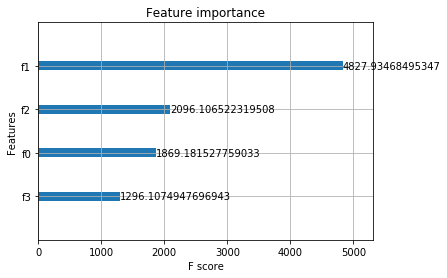

In [151]:
plt.figure()
plot_importance(xgb_model, importance_type='gain')

In [152]:
train_log_trend = train_log_trend.values

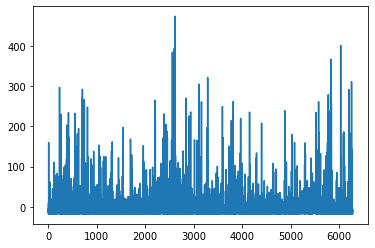

In [153]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_train.reshape(-1,1), train_log_trend.reshape(-1,1))

In [154]:
xgb_model = XGBRegressor(n_estimators=500, max_depth=3, learning_rate=1.2)
xgb_model.fit(x_train_month_year_2ylag, train_log_trend.reshape(-1,1)[48:])
y_pred_xgb_2ylag_wotrend = xgb_model.predict(x_test_month_year_2ylag)

In [155]:
xgb_model.score(x_train_month_year_2ylag, train_log_trend.reshape(-1,1)[48:])

0.9942826932941996

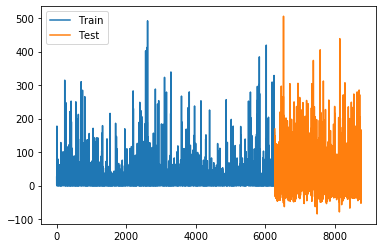

In [156]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label ='Train')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_wotrend, label ='Test')
ax.legend()

In [157]:
y_pred_xgb_2ylag_desc = (y_pred_xgb_2ylag_wotrend + model.predict(x_test.reshape(-1, 1)).squeeze())

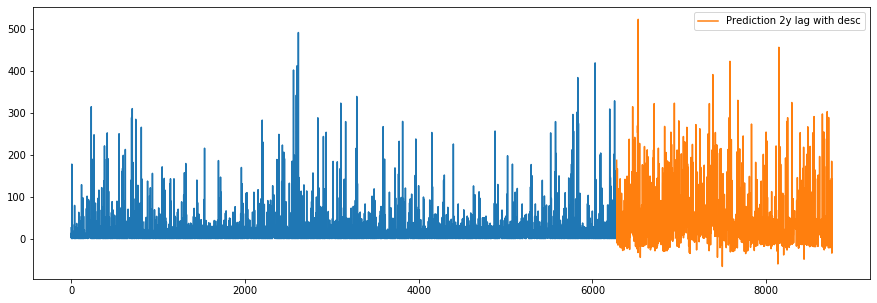

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
#ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')

#ax.plot(x_test, forecast_daily, linewidth='3', linestyle='--', markersize= 0.2, marker='o')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_wotrend, label='wotrend')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction seasonality')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag, label='Prediction 2y lag')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_desc, label='Prediction 2y lag with desc')
ax.legend()

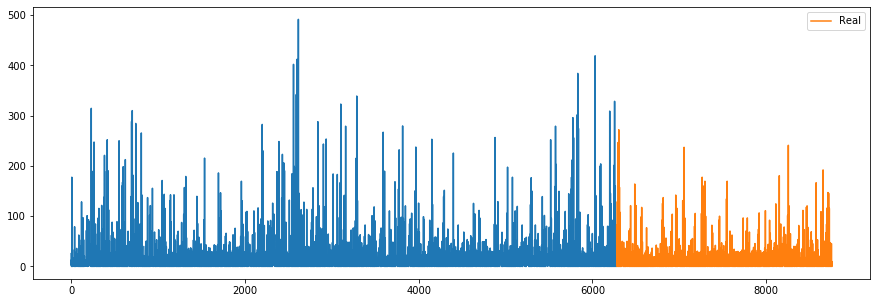

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.legend()

In [160]:
xgb_model.score(x_test_month_year_2ylag, y_pred_xgb_2ylag_desc)

0.9012600044453088